ANLY-590 Assignment 1

Ruizhe Li

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('Hitters.csv')

## Data Cleaning

In [3]:
df.head()

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [4]:
df.isna().sum()

Unnamed: 0     0
AtBat          0
Hits           0
HmRun          0
Runs           0
RBI            0
Walks          0
Years          0
CAtBat         0
CHits          0
CHmRun         0
CRuns          0
CRBI           0
CWalks         0
League         0
Division       0
PutOuts        0
Assists        0
Errors         0
Salary        59
NewLeague      0
dtype: int64

In [5]:
df = df.dropna()

In [6]:
df.isna().sum()

Unnamed: 0    0
AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary        0
NewLeague     0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  263 non-null    object 
 1   AtBat       263 non-null    int64  
 2   Hits        263 non-null    int64  
 3   HmRun       263 non-null    int64  
 4   Runs        263 non-null    int64  
 5   RBI         263 non-null    int64  
 6   Walks       263 non-null    int64  
 7   Years       263 non-null    int64  
 8   CAtBat      263 non-null    int64  
 9   CHits       263 non-null    int64  
 10  CHmRun      263 non-null    int64  
 11  CRuns       263 non-null    int64  
 12  CRBI        263 non-null    int64  
 13  CWalks      263 non-null    int64  
 14  League      263 non-null    object 
 15  Division    263 non-null    object 
 16  PutOuts     263 non-null    int64  
 17  Assists     263 non-null    int64  
 18  Errors      263 non-null    int64  
 19  Salary      263 non-null    f

In [8]:
df = df.select_dtypes(include=np.number)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   AtBat    263 non-null    int64  
 1   Hits     263 non-null    int64  
 2   HmRun    263 non-null    int64  
 3   Runs     263 non-null    int64  
 4   RBI      263 non-null    int64  
 5   Walks    263 non-null    int64  
 6   Years    263 non-null    int64  
 7   CAtBat   263 non-null    int64  
 8   CHits    263 non-null    int64  
 9   CHmRun   263 non-null    int64  
 10  CRuns    263 non-null    int64  
 11  CRBI     263 non-null    int64  
 12  CWalks   263 non-null    int64  
 13  PutOuts  263 non-null    int64  
 14  Assists  263 non-null    int64  
 15  Errors   263 non-null    int64  
 16  Salary   263 non-null    float64
dtypes: float64(1), int64(16)
memory usage: 37.0 KB


## LASSO Regression

In [10]:
y = df.Salary
X = df.drop('Salary', axis = 1).astype('float64')
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   AtBat    263 non-null    float64
 1   Hits     263 non-null    float64
 2   HmRun    263 non-null    float64
 3   Runs     263 non-null    float64
 4   RBI      263 non-null    float64
 5   Walks    263 non-null    float64
 6   Years    263 non-null    float64
 7   CAtBat   263 non-null    float64
 8   CHits    263 non-null    float64
 9   CHmRun   263 non-null    float64
 10  CRuns    263 non-null    float64
 11  CRBI     263 non-null    float64
 12  CWalks   263 non-null    float64
 13  PutOuts  263 non-null    float64
 14  Assists  263 non-null    float64
 15  Errors   263 non-null    float64
dtypes: float64(16)
memory usage: 34.9 KB


In [11]:
alphas = 10**np.linspace(10, -2, 200)*0.8
alphas

array([8.00000000e+09, 6.96287309e+09, 6.06020021e+09, 5.27455062e+09,
       4.59075332e+09, 3.99560409e+09, 3.47761053e+09, 3.02677009e+09,
       2.63437700e+09, 2.29285409e+09, 1.99560651e+09, 1.73689436e+09,
       1.51172187e+09, 1.31574094e+09, 1.14516715e+09, 9.96706691e+08,
       8.67492775e+08, 7.55030262e+08, 6.57147487e+08, 5.71954319e+08,
       4.97805667e+08, 4.33269710e+08, 3.77100251e+08, 3.28212648e+08,
       2.85662877e+08, 2.48629295e+08, 2.16396778e+08, 1.88342913e+08,
       1.63925975e+08, 1.42674470e+08, 1.24178029e+08, 1.08079482e+08,
       9.40679643e+07, 8.18729122e+07, 7.12588371e+07, 6.20207799e+07,
       5.39803524e+07, 4.69822929e+07, 4.08914679e+07, 3.55902626e+07,
       3.09763103e+07, 2.69605146e+07, 2.34653302e+07, 2.04232645e+07,
       1.77755749e+07, 1.54711340e+07, 1.34654428e+07, 1.17197712e+07,
       1.02004099e+07, 8.87801997e+06, 7.72706579e+06, 6.72532231e+06,
       5.85344571e+06, 5.09459996e+06, 4.43413162e+06, 3.85928696e+06,
      

Text(0.5, 1.0, 'Coefficient Trajectories in LASSO')

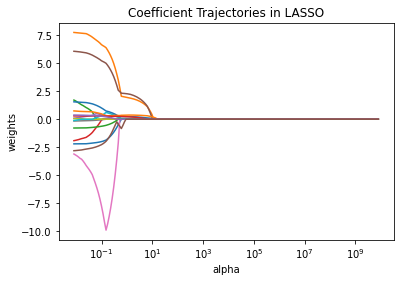

In [12]:
lasso = Lasso(max_iter = 10000, normalize = True)
coefs = []

for a in alphas:
  lasso.set_params(alpha = a)
  lasso.fit(X, y)
  coefs.append(lasso.coef_)

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title("Coefficient Trajectories in LASSO")

In [13]:
c = []
for coef in coefs:
  c.append(len([x for x in coef if x > 0]))

# Get the index in coefs where only 3 coefficients not zero
idx = c.index(3)

coefs_3 = coefs[idx]

colnames = X.columns.values.tolist()

colnames = [colnames[i] for i in range(len(colnames)) if coefs_3[i] > 0]

colnames

['Hits', 'CRuns', 'CRBI']

The final three predictors that remain in the model are ['Hits', 'CRuns', 'CRBI'].

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state=1)

lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(X_train, y_train)

print("Optimal value using crossing validation:")
lasso.set_params(alpha = lassocv.alpha_)
print("Optimized alpha:", lassocv.alpha_)
lasso.fit(X_train, y_train)
print("mean squared error:", mean_squared_error(y_test, lasso.predict(X_test)))

Optimal value using crossing validation:
Optimized alpha: 2.2410206769492604
mean squared error: 111160.39367053009


In [15]:
print("Pridictors left in the optimal model after cross validation:")
print(pd.Series(lasso.coef_, index=X.columns))
print("6 pridictros left for the optimal model")

Pridictors left in the optimal model after cross validation:
AtBat      0.000000
Hits       0.951516
HmRun      0.000000
Runs       0.000000
RBI        0.402763
Walks      2.774631
Years      0.000000
CAtBat     0.000000
CHits      0.000000
CHmRun     0.268635
CRuns      0.000000
CRBI       0.492185
CWalks     0.000000
PutOuts    0.394770
Assists    0.000000
Errors    -0.000000
dtype: float64
6 pridictros left for the optimal model


## Ridge Regression

Text(0.5, 1.0, 'Coefficient Trajectories for Ridge Regression')

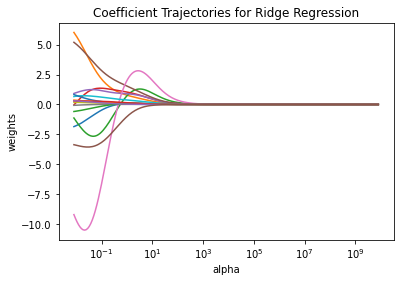

In [16]:
ridge = Ridge(normalize = True)
coefs2 = []

for a in alphas:
  ridge.set_params(alpha = a)
  ridge.fit(X, y)
  coefs2.append(ridge.coef_)

ax2 = plt.gca()
ax2.plot(alphas, coefs2)
ax2.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Coefficient Trajectories for Ridge Regression')

In [17]:
ridgecv = RidgeCV(alphas = alphas, normalize = True)
ridgecv.fit(X_train, y_train)
print("Optimal value using crossing validation:")
print("Optimized Alpha = ", ridgecv.alpha_)
ridge2 = Ridge(alpha = ridgecv.alpha_, normalize = True)
ridge2.fit(X_train, y_train)
print("Mean Squared Error:", mean_squared_error(y_test, ridge2.predict(X_test)))
print("Best model Coefficients:")
pd.Series(ridge2.coef_, index = X.columns)

Optimal value using crossing validation:
Optimized Alpha =  0.5153890806977096
Mean Squared Error: 104870.40960609083
Best model Coefficients:


AtBat     -0.055220
Hits       0.863418
HmRun     -0.439543
Runs       0.680945
RBI        1.514894
Walks      2.062857
Years      0.371970
CAtBat     0.006088
CHits      0.052720
CHmRun     0.523275
CRuns      0.109405
CRBI       0.130584
CWalks     0.100335
PutOuts    0.308959
Assists    0.013252
Errors     0.165823
dtype: float64

## 2. Short Answer

Bias-variance tradeoff is the property that models with a lower bias in parameter estimation have a higher viariance of the parameter estimates across samples and vice versa. 

Regularization such as LASSO and Ridge regression helps the model to prevent from overfitting by neglating of minizing the effect of predictor clumns with large outliers, by panalizing their regression coefficients.

In LASSO regression, when alpha is small, the model is overfitting and leads to high variance since every predictor are counted in the model. While the alpha is large, almost all predictors turn to 0 and the bias is high in the model.